# Practical Session 3

# Importing libraries 

In [1]:
import numpy as np
import pylab as pl
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras  import optimizers
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from random import randint

# 1 Datasets description

In [2]:
pimaPath = "/Users/martialgil/Desktop/COURS/Master data IP/P1/practical introduction to ML/TP/TP3/Data/pima.npz"
digitPath="/Users/martialgil/Desktop/COURS/Master data IP/P1/practical introduction to ML/TP/TP3/Data/digits.npz"

### 1.1 Pima dataset

In [3]:
pima = np.load(pimaPath)

In [4]:
pimaData= pima["xall"]
pima["xall"]

array([[  7.   , 159.   ,  64.   , ...,  27.4  ,   0.294,  40.   ],
       [  0.   , 180.   ,  66.   , ...,  42.   ,   1.893,  25.   ],
       [  1.   , 146.   ,  56.   , ...,  29.7  ,   0.564,  29.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [5]:
Ypima= pima["yall"]
YToUnderstand=pd.Series(Ypima)
nombreDiabteique=YToUnderstand.where(YToUnderstand==1).count()
nombreNonDiabteique=YToUnderstand.where(YToUnderstand==-1).count()

print("Nombre diabétique dans le dataset :",nombreDiabteique)
print("Nombre de non diabétique dans le dataset :",nombreNonDiabteique)


Nombre diabétique dans le dataset : 242
Nombre de non diabétique dans le dataset : 467


**comment :** An important point here is to see the dataframe is unbalanced. Indeed, we have nearly twice non diabetic compare to number of diabetic in our dataset. We are going to use special measure in order to measure performances of our models.

In [6]:
FeaturesPima= pima["varnames"]
pima["varnames"]

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='<U24')

In [7]:
pimaDataPD = pd.DataFrame(pima['xall'], columns = pima["varnames"])
pimaDataPD.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000
mean,3.747532,121.607898,69.643159,20.765867,80.531735,32.453032,0.470961,33.021157
std,3.339502,30.490598,18.135582,15.899540,112.678399,6.950733,0.325256,11.669089
min,0.000000,44.000000,0.000000,0.000000,0.000000,18.200000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.500000,0.243000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.374000,29.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.600000,0.629000,40.000000
max,17.000000,199.000000,122.000000,99.000000,744.000000,67.100000,2.420000,81.000000


**comment :** We can clearly see that all features aren't at the same scale. Indeed, some features have really low values like pregnancies, and other are bigger ( Glucose has a mean 40 times bigger). So we should take this information in order to have comparable features.

### 1.2 Digits dataset



In [8]:
digitFile = np.load(digitPath)
digit =digitFile['xt']/255
yDigit=digitFile['yt']

In [9]:
yDigit

array([[1],
       [1],
       [1],
       ...,
       [8],
       [8],
       [8]], dtype=uint8)

**comment :** Here is the label of each features, we have 1, 7 and 8 as label in our image dataset

In [10]:
digit

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**comment :** This dataset contains all information about pixels of each features. Like that, we can't interpret anything, let's do some interpretations by printing some pictures!

In [11]:
digit1 = digit[0:500 , :]
digit7 = digit[500:1000 , :]
digit8 = digit[1000:1500 , :]

(-0.5, 27.5, 27.5, -0.5)

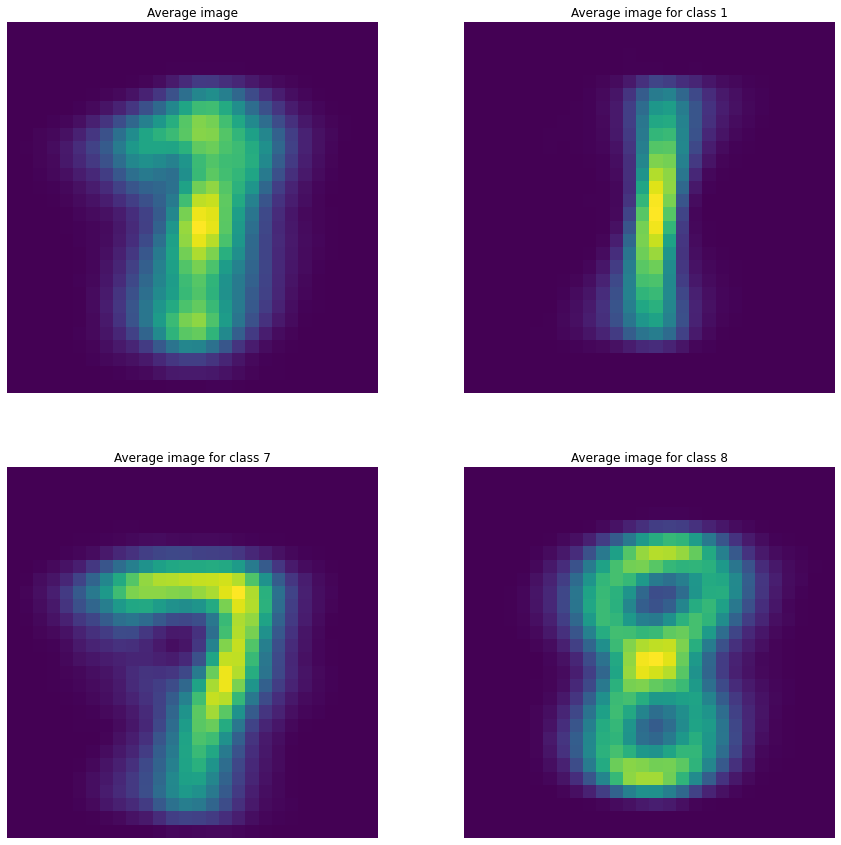

In [12]:
average_digit =np.mean(digit, axis=0)
average_digit_1 = np.mean(digit1, axis=0)
average_digit_7 = np.mean(digit7, axis=0)
average_digit_8 = np.mean(digit8, axis=0)


plt.figure(figsize = (15,15))
plt.subplot(2, 2, 1)
plt.imshow(average_digit.reshape(28, 28))
plt.title('Average image')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(average_digit_1.reshape(28, 28))
plt.title('Average image for class 1')
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(average_digit_7.reshape(28, 28))
plt.title('Average image for class 7')
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(average_digit_8.reshape(28, 28))
plt.title('Average image for class 8')
plt.axis('off')

**comment :** Here I printed the average image of each category of numbers. The first one is the average of all of them. We can have really interesting interpretation. Indeed, only the center part of the picture contains real information, so pixels all around this center, are useless. For the others pictures, it is really interesting because we can really distinguish the number of their class (hopefully). 

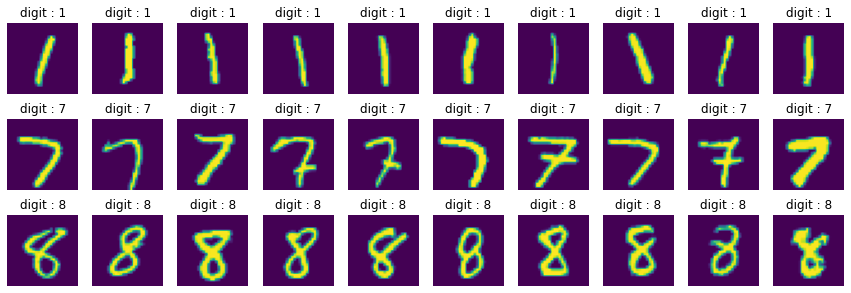

In [13]:
plt.figure(figsize = (15,5))

for typeImage in range(3):
    nombre=1
    if typeImage==1:
        nombre=7
    if typeImage==2:
        nombre=8
    for photo in range(10):
        plt.subplot(3, 10, (typeImage)*10+1+photo)
        plt.imshow(digit[typeImage*500+photo+1].reshape(28, 28))
        
        plt.title('digit : '+str(nombre))
        plt.axis('off')

**comment :** Here I have printed some samples from the dataset. We can see that for the 8, there are really different types of ways for writting numbers. We can clearly distinguish all of them, but there are some 7 that could look like 1. 8 are really easy to distinguish. Furthermore, there are two ways to write a 7, with a middle bar and without.

# 2 Predicting Diabetes on the Pima dataset

### 2.1 Know the data

• Visualize the data as scatterplots between pairs of variables (where the color is the class).

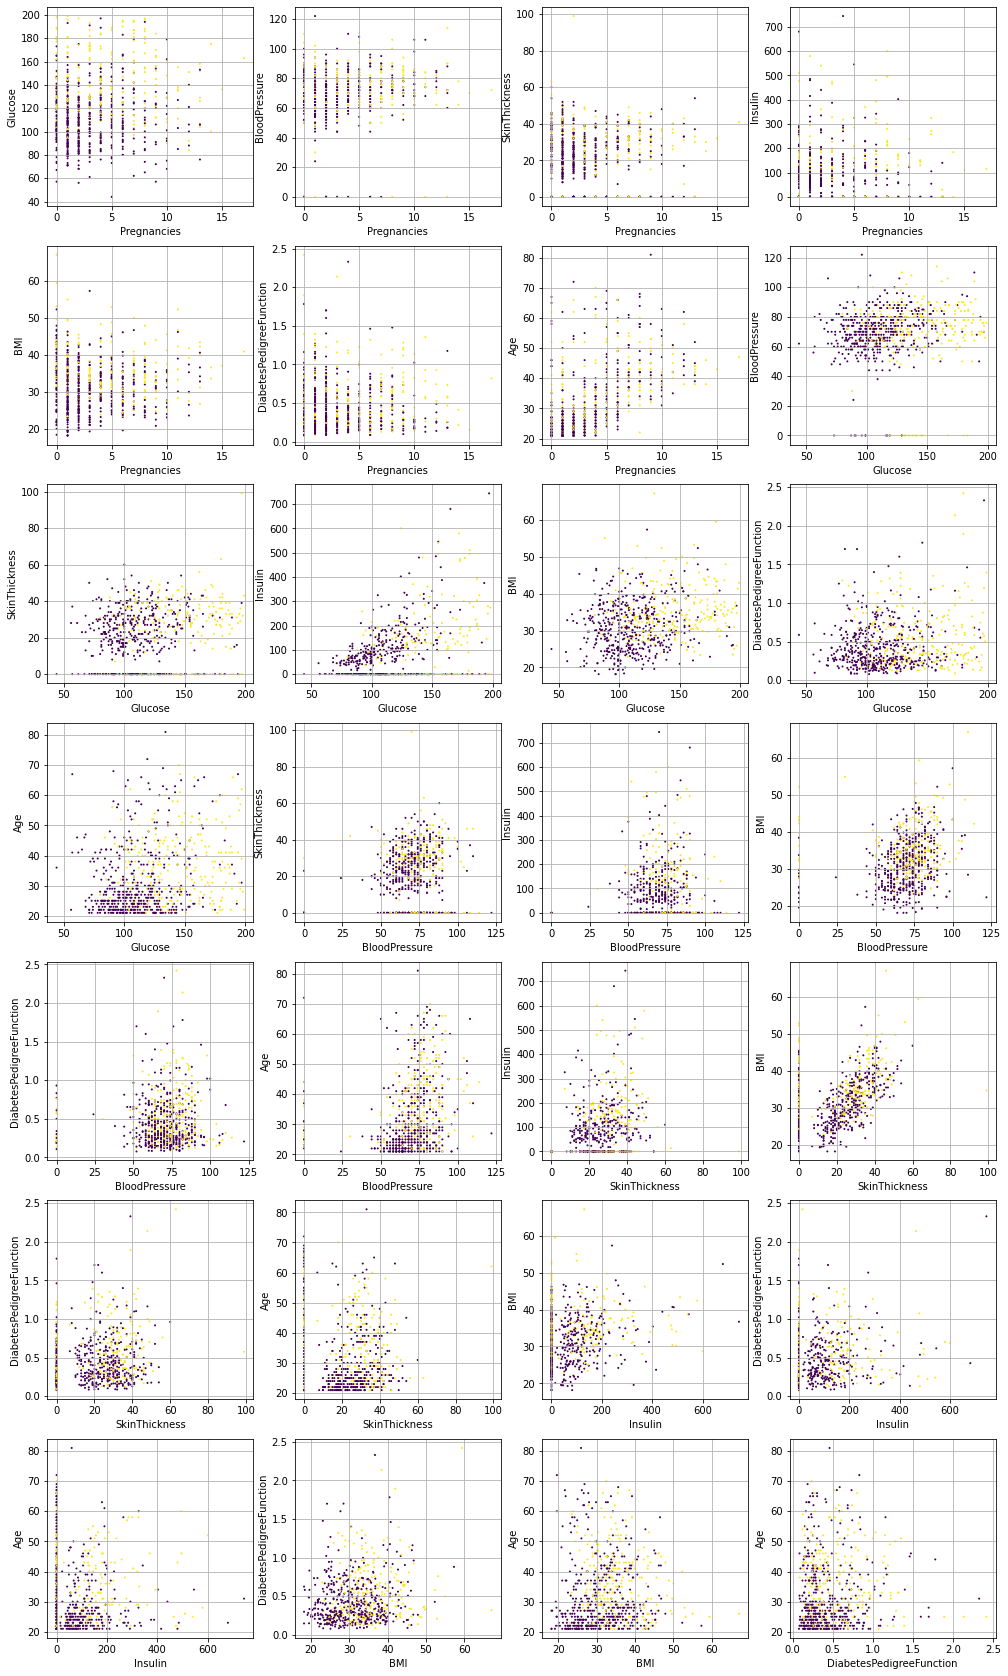

In [14]:
plt.figure(figsize=(17,30))
rang=1
for i in range(8):
    for j in range(i+1,8):
        plt.subplot(7,4,rang)
        plt.scatter(pimaData[:,i], pimaData[:,j],  s=1, c=Ypima)
        plt.grid()
        plt.xlabel(FeaturesPima[i])
        plt.ylabel(FeaturesPima[j])
        rang+=1

**comment :** There are clearly some couples of features that have a lot of effect on the fact if one person is sick or not. For example the couple Insulin and glucose.  We could see some variables has a lot of effect, the most important for me are : Glucose, BMI and diabete pedigree function seems to be the most important. This analysis is purely subjective.

• What are the variables that seem to help predict the class? Do those variable make sense from a
medical perspective ?

**comment :** A part of the answer is just above. I think the variable quoted just before make a good sense to predict from a medical perspective.
I think the result we are getting with the interpretation of our graph seems good.

• Split the data in training/test by keeping n = 300 samples for training/validation and the remaining for test.


In [15]:
pimaXtrain, pimaXtest, pimaYtrain,pimaYtest  =train_test_split(pimaData, Ypima, train_size=300, shuffle=False)
#print(len(pimaYtest))

**comment :** I need to shuffle my dataset in order to be sure to have all kind of people in my both dataset. Here, the teacher told us it is okay to not shuffle it and it would it be easier for him to compare my results. So I didn't shuffle it.

• Do the feature have similar variances/scaling? Is that a problem?

Text(0.5, 1.0, 'Variance de nos features')

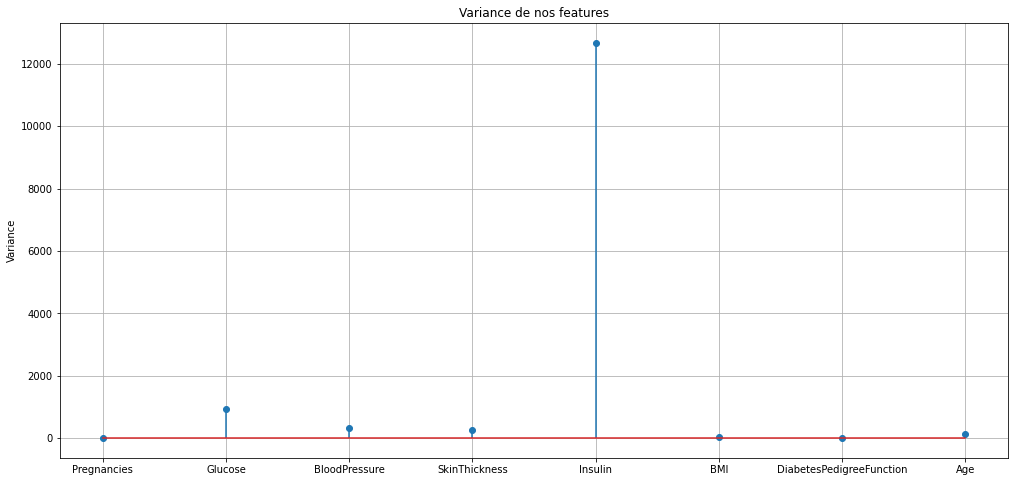

In [16]:
plt.figure(figsize=(17,8))
plt.stem(FeaturesPima, np.var(pimaData, axis=0))
plt.ylabel('Variance')
plt.grid()
plt.title('Variance de nos features')

**comment :** Here, we clearly see features haven't the same scale. Indeed, insulin is really higher than others from far (it is not the only one to have big variance). It could be a problem because for some models , it could give really a lot of weight to measure with high values and variance compare to others. And it is important to underline it is not because a value is high or have a large variance, that means it is important.

• Apply a standardization to the training and test data (StandardScaler).

In [17]:
scaler = StandardScaler(with_mean=False)
pimaXtrain = scaler.fit_transform(pimaXtrain)
pimaXtest = scaler.fit_transform(pimaXtest)

Text(0.5, 1.0, 'Variance de nos features')

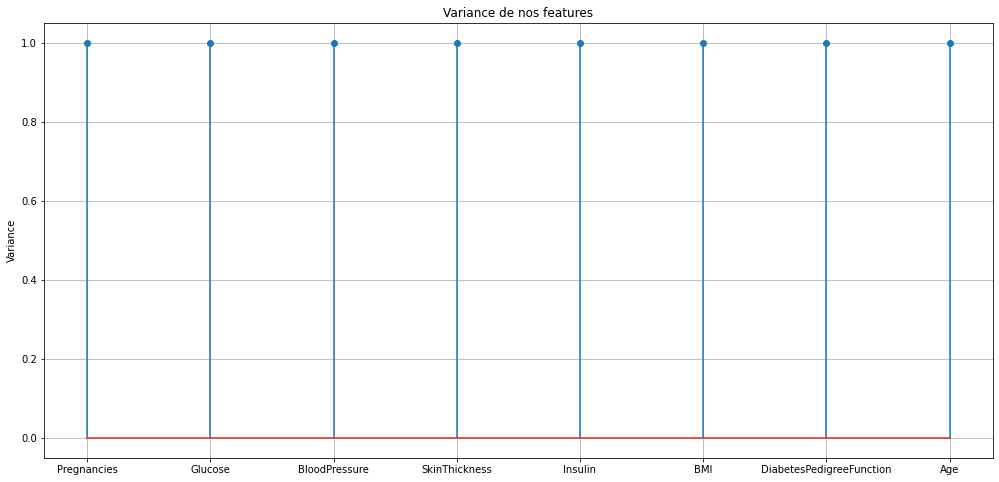

In [18]:
plt.figure(figsize=(17,8))
plt.stem(FeaturesPima, np.var(pimaXtrain, axis=0))
plt.ylabel('Variance')
plt.grid()
plt.title('Variance de nos features')

**comment :** By standardizing our dataset, we don't have anymore issue with different variance in our dataset, now all features have the same variance.

### 2.2 Bayesian decision and linear classification

In [19]:
score=[]
index=[]

**comment** These lists are build in order to store the performance of the different algorithms we are going to try in this lab.

**comment** Here, there are some tasks that are really repetitive, so I have decided to build a general function in order to offer an easier reading for this notebook.

In [20]:
def testDuModel(model,paramGrid,X_train,Y_train,X_test,Y_test):
    
    reg_param_GS = GridSearchCV(model, param_grid =paramGrid ) 
    reg_param_GS.fit(X_train,Y_train)
    print("The best estimator across all searched params:\n",reg_param_GS.best_params_)
    print("\n####################################################################")
    Y_trainPredict= reg_param_GS.predict(X_train)
    Y_testPredict= reg_param_GS.predict(X_test)
    
    acTrain =accuracy_score(Y_train, Y_trainPredict)
    acTest=accuracy_score(Y_test,Y_testPredict )
    print("\nAccuracy Score")
    print("Accuracy Training is :", acTrain)
    print("Accuracy Test is :",acTest)

    Y_trainPredict=reg_param_GS.predict_proba(X_train)[:,1]
    Y_testPredict=reg_param_GS.predict_proba(X_test)[:,1]
    ROC_train= roc_auc_score(Y_train,Y_trainPredict)
    ROC_test= roc_auc_score(Y_test,Y_testPredict)
    print("\nROC AUC Score")
    print("ROC AUC Training is :", ROC_train)
    print("ROC AUC Test is :", ROC_test)
    print("\n####################################################################")

    liste=[acTrain,acTest,ROC_train,ROC_test]
    
    return liste


###Cette algorithme donne les performances d'un model par defaut
def testDuModelSansOptimisation(model,X_train,Y_train,X_test,Y_test,affichage=0):
    
    model.fit(X_train,Y_train)
     
    Y_trainPredict= model.predict(X_train)
    Y_testPredict= model.predict(X_test)
    acTrain =accuracy_score(Y_train, Y_trainPredict)
    acTest=accuracy_score(Y_test,Y_testPredict )
    print("Accuracy Score")
    print("Accuracy Training is :", acTrain)
    print("Accuracy Test is :",acTest)
    
    Y_trainPredict=model.predict_proba(X_train)[:,1]
    Y_testPredict=model.predict_proba(X_test)[:,1]
    ROC_train= roc_auc_score(Y_train,Y_trainPredict)
    ROC_test= roc_auc_score(Y_test,Y_testPredict)
    print("\nROC AUC Score")
    print("ROC AUC Training is :", ROC_train)
    print("ROC AUC Test is :", ROC_test)
    
    liste=[acTrain,acTest,ROC_train,ROC_test]
    if affichage==1:
        return liste
    return 



### Linear Discriminant Analysis

• Train a Linear Discriminant Analysis (LDA) classifier with the default parameters, compute its accu- racy and AUC on the test data (LinearDiscriminantAnalysis,roc_auc_score). Note that in order to compute the AUC you will need to compute the score with est.predict_proba and keep the second column (probability of the class 1).

In [21]:
clf = LinearDiscriminantAnalysis()
testDuModelSansOptimisation(clf,pimaXtrain,pimaYtrain,
                            pimaXtest,pimaYtest)

Accuracy Score
Accuracy Training is : 0.76
Accuracy Test is : 0.8068459657701712

ROC AUC Score
ROC AUC Training is : 0.828421052631579
ROC AUC Test is : 0.8619680560113773


**comment** These results seems good, but we can't comment to much about them because we haven't other model to compare with.

• Perform a cross validation GridSearchCV) for the parameters of the method (shrinkage). Does the validation leads to better performance? What is the optimal value for the parameter?

In [22]:
clfLDA = LinearDiscriminantAnalysis(solver = 'lsqr')
parametre_LDA={"shrinkage":np.arange(0,1,0.02)}
shrinkage_GS = GridSearchCV(clfLDA, param_grid = parametre_LDA)
shrinkage_GS.fit(pimaXtrain, pimaYtrain)
data_learning = pd.DataFrame(shrinkage_GS.cv_results_)

The optimal value of shrinkage is :  0.02


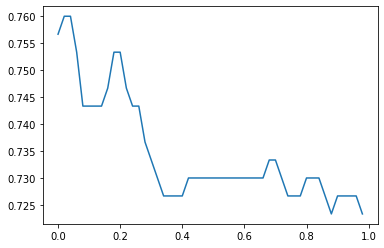

In [23]:
X_axis =np.arange(0,1,0.02)
plt.plot(X_axis,data_learning["mean_test_score"])
position_max =np.argmax(data_learning["mean_test_score"])
print("The optimal value of shrinkage is : ",data_learning["params"][position_max]["shrinkage"])

**comment** Before using my function, I want to verify if we get same result with the "manual verification" and my function, this is why I have printed this graph. Here, we can see our algorithm is working well for really small values of shrinkage.

In [24]:
clfLDA = LinearDiscriminantAnalysis(solver = 'lsqr')
parametre_LDA={"shrinkage":np.arange(0,1,0.02),
              "solver" :['lsqr']}

perf=testDuModel(clfLDA,
            parametre_LDA,pimaXtrain,pimaYtrain,
                            pimaXtest,pimaYtest)
score.append(perf)
index.append("LDA")

The best estimator across all searched params:
 {'shrinkage': 0.02, 'solver': 'lsqr'}

####################################################################

Accuracy Score
Accuracy Training is : 0.7633333333333333
Accuracy Test is : 0.8092909535452323

ROC AUC Score
ROC AUC Training is : 0.8285645933014354
ROC AUC Test is : 0.8624056448966197

####################################################################


**comment** We get the same value for the optimal shrinkage, so my function seems to work well. It is really good because we are getting a lot of score with it. With my function, we can read what is the best parameters. Here, the effect of choosing our parameter has not a lot effect on the performance of our model. Indeed, we have nearly the same value of the default model.

### Quadratic Discriminant Analysis

• Train a Quadratic Discriminant Analysis (QDA) classifier with the default parameters, compute its accuracy and AUC on the test data (QuadraticDiscriminantAnalysis). Is the performance better than LDA?

In [25]:
clf = QuadraticDiscriminantAnalysis()
testDuModelSansOptimisation(clf,pimaXtrain,pimaYtrain,
                            pimaXtest,pimaYtest)

Accuracy Score
Accuracy Training is : 0.7533333333333333
Accuracy Test is : 0.7408312958435208

ROC AUC Score
ROC AUC Training is : 0.8399521531100478
ROC AUC Test is : 0.795946832950443


**comment** The accuracy and ROC AUC are worse than the previous model.

• Perform a cross validation for the parameters of the method (reg_param). Does the validation leads to better performance? What is the optimal value for the parameter.

In [26]:
reg_param_GS = GridSearchCV(clf, param_grid = {'reg_param':np.arange(0,1,0.02)}) 
reg_param_GS.fit(pimaXtrain, pimaYtrain)
data_learning = pd.DataFrame(reg_param_GS.cv_results_)

The optimal value of reg_param is :  0.62


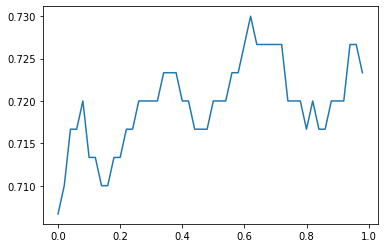

In [27]:
X_axis =np.arange(0,1,0.02)
plt.plot(X_axis,data_learning["mean_test_score"])
position_max =np.argmax(data_learning["mean_test_score"])
print("The optimal value of reg_param is : ",data_learning["params"][position_max]["reg_param"])

In [28]:
clfLDA = QuadraticDiscriminantAnalysis()

paramQDA ={'reg_param':np.arange(0,1,0.02)}
parametre_LDA={"shrinkage":np.arange(0,1,0.02),
              "solver" :['lsqr']}

perf=testDuModel(clfLDA,
            paramQDA,pimaXtrain,pimaYtrain,
                            pimaXtest,pimaYtest)
score.append(perf)
index.append("QDA")

The best estimator across all searched params:
 {'reg_param': 0.62}

####################################################################

Accuracy Score
Accuracy Training is : 0.7533333333333333
Accuracy Test is : 0.7946210268948656

ROC AUC Score
ROC AUC Training is : 0.8316746411483255
ROC AUC Test is : 0.8544469970462751

####################################################################


**comment** For the QDA model, the choice of parameters has an important impact compare to LDA model. In fact, we have an increase of 5% for the accuracy and 5.5% for the ROC AUC. However, QDA has worse performance than LDA.

### Gaussian Naive Bayes 

• Train a Gaussian Naive Bayes (NB) classifier (GaussianNB). What is its performance with respect to QDA and LDA?

In [29]:
QDA = QuadraticDiscriminantAnalysis()
nb = GaussianNB()
perf= testDuModelSansOptimisation(QDA,pimaXtrain,pimaYtrain,
                            pimaXtest,pimaYtest,1)


score.append(perf)
index.append("Gaussian NB")

Accuracy Score
Accuracy Training is : 0.7533333333333333
Accuracy Test is : 0.7408312958435208

ROC AUC Score
ROC AUC Training is : 0.8399521531100478
ROC AUC Test is : 0.795946832950443


**comment** Our Gaussian Naive Bayes model has worse result than QDA and LDA for our both scores. The gaussian is just better than the default QDA, but this comment is not really relevant. We are surely not going to keep it.

### Logistic Regression

• Train a Logistic regression classifier (LogisticRegression) with the default parameters. Compute its performance and compare it to the previous classifiers.

In [30]:
lr = LogisticRegression(max_iter=3000)
testDuModelSansOptimisation(lr,pimaXtrain,pimaYtrain,
                            pimaXtest,pimaYtest)

Accuracy Score
Accuracy Training is : 0.77
Accuracy Test is : 0.8068459657701712

ROC AUC Score
ROC AUC Training is : 0.8298086124401913
ROC AUC Test is : 0.862296247675309


**comment** Here we hace pretty good result for a default algorithm. We have have one of the best performance from all our models. 

• Perform a a cross validation for the parameters of the model (C) by setting the penalization to L1. Is the model sparse? What variables were removed from the model? Is the classifier performing well?

In [31]:
penalty=["l1"]
C=np.logspace(-2,1,30)
solver = ['liblinear']
paramLR={"penalty": penalty,
         "C":C,
         "solver":solver
         }


In [32]:
lr = LogisticRegression(max_iter=3000)
perf= testDuModel(lr,paramLR,pimaXtrain,pimaYtrain,
                            pimaXtest,pimaYtest)


score.append(perf)
index.append("Logistic L1")

The best estimator across all searched params:
 {'C': 0.4520353656360243, 'penalty': 'l1', 'solver': 'liblinear'}

####################################################################

Accuracy Score
Accuracy Training is : 0.7666666666666667
Accuracy Test is : 0.7995110024449877

ROC AUC Score
ROC AUC Training is : 0.8277511961722488
ROC AUC Test is : 0.8663986434744557

####################################################################


**comment** Our model is working well, but the tunning is not really effective, because we have similar performance as before.

Text(0.5, 1.0, 'Coefficients of the Logistic Regression')

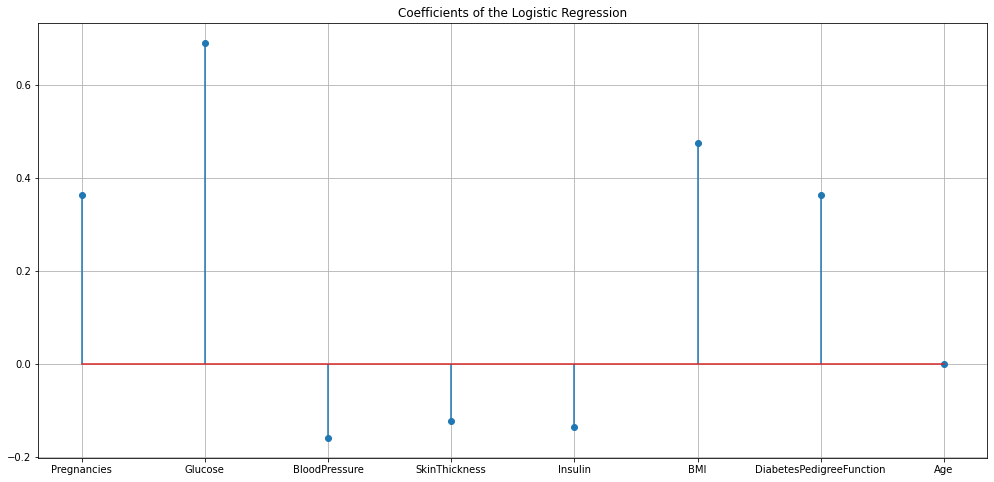

In [33]:
lr = LogisticRegression(max_iter=3000,C= 0.4520353656360243, penalty='l1', solver='liblinear')
lr.fit(pimaXtrain,pimaYtrain)
w_lr = lr.coef_[0]
# Plotting
plt.figure(figsize=(17,8))
plt.stem(FeaturesPima, w_lr)
plt.grid()
plt.title('Coefficients of the Logistic Regression')

**comment** Our model isn't really sparse. Indeed, only one variable has been removed, it is the age.

• What is the best decision method so far? Is the best model linear (LAD,LR) on quadratic (QDA,NB)?

In [34]:
columns = ['Train Accuracy', 'Test Accuracy','Train ROC AUC','Test ROC AUC']
comparaison = pd.DataFrame(score, index=index, columns=columns)
print(comparaison)

             Train Accuracy  Test Accuracy  Train ROC AUC  Test ROC AUC
LDA                0.763333       0.809291       0.828565      0.862406
QDA                0.753333       0.794621       0.831675      0.854447
Gaussian NB        0.753333       0.740831       0.839952      0.795947
Logistic L1        0.766667       0.799511       0.827751      0.866399


**comment** From all our models, the best one is  LDA. This model is achieving the best accuracy and also one of the best ROC AUC. The logistic regression has really near performance than LDA.

• Interpret the separability of the sample in the predicted score space by plotting histograms for the
samples for each class in 1D.

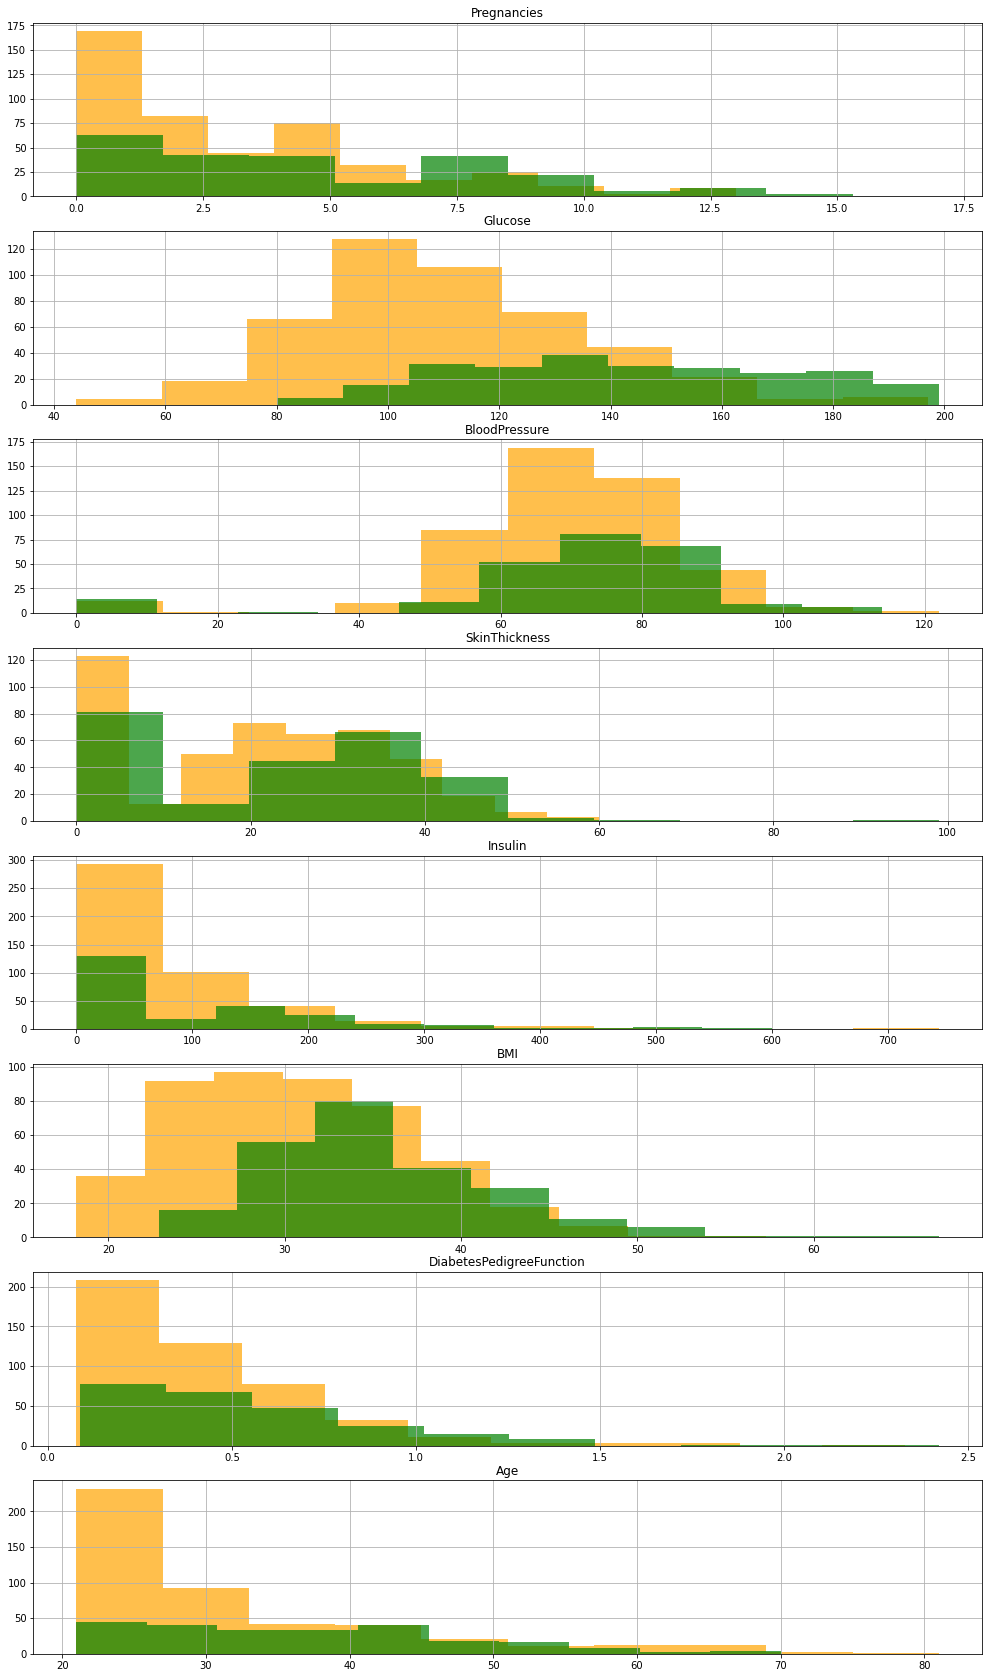

In [35]:
plt.figure(figsize=(17,30))
rang=1


for i in range(8):
    plt.subplot(8,1,rang)
    datay0=[x for i,x in enumerate(pimaData[:,i]) if Ypima[i]==-1]
    datay1=[x for i,x in enumerate(pimaData[:,i]) if Ypima[i]==1]
    plt.hist(datay0,alpha=0.7,  color = "orange")
    plt.hist(datay1,alpha=0.7,color = "green")
    plt.grid()
    #plt.xlabel(FeaturesPima[i])
    plt.title(FeaturesPima[i])
    rang+=1

**comment** Here, we can see what are the features that could help in order to predict if a person is sick or not. We can see that features that help the most are Glucose and BMI. Blood pressure could also help. The others features looks to help less, but it is hard to interpret.

• Interpret the weight for a good linear model. What is the effect of each variable on the risk of diabetes? Does it make medical sense?


In [36]:
bestModel=LinearDiscriminantAnalysis(shrinkage= 0.02, solver ='lsqr')
bestModel.fit(pimaXtrain,pimaYtrain)
coef = bestModel.coef_

Text(0.5, 1.0, 'Coefficients of the best linear model')

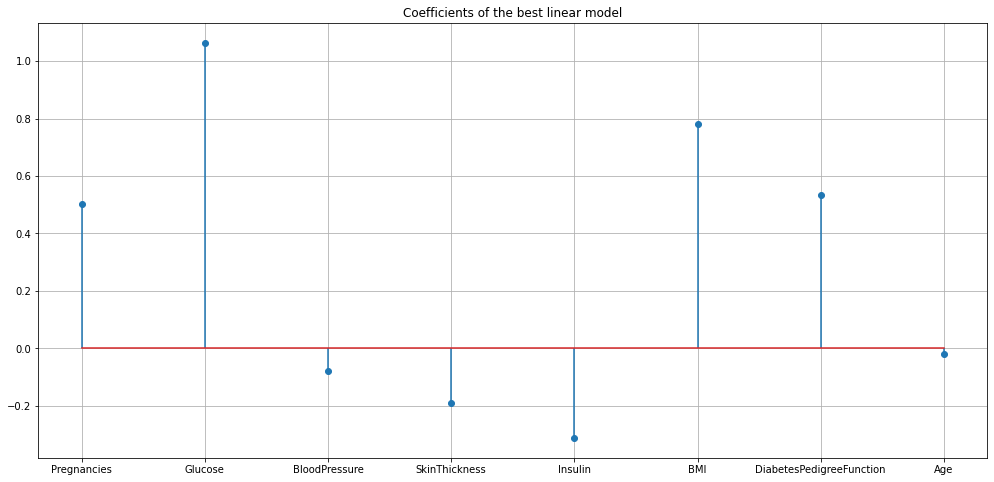

In [37]:
# Plotting
plt.figure(figsize=(17,8))
plt.stem(FeaturesPima, coef[0])
plt.grid()
plt.title('Coefficients of the best linear model')

**comment** Here, we can see the selection from our previous selection (BMI and Glucose) are good because they are the features that have the most impact on our model. But we have missed a lot of them like diabete pedigree function or pregnancies that are important too. 

In [38]:
for i,fetaure in enumerate(FeaturesPima) :
    print("L'impact de",fetaure,"on our prediction is",round(coef[0,i],3) )

L'impact de Pregnancies on our prediction is 0.502
L'impact de Glucose on our prediction is 1.065
L'impact de BloodPressure on our prediction is -0.079
L'impact de SkinThickness on our prediction is -0.189
L'impact de Insulin on our prediction is -0.313
L'impact de BMI on our prediction is 0.78
L'impact de DiabetesPedigreeFunction on our prediction is 0.535
L'impact de Age on our prediction is -0.02


**comment** I am not a specialist, but the results seems to be coherent with our reality!

## 2.3 Nonlinear methods

### Random Forest

• Fit the model with the default parameters and compute its prediction performance. Is it better than a linear estimator?

In [39]:
Forest = RandomForestClassifier()
testDuModelSansOptimisation(Forest,pimaXtrain,pimaYtrain,
                            pimaXtest,pimaYtest)

Accuracy Score
Accuracy Training is : 1.0
Accuracy Test is : 0.7921760391198044

ROC AUC Score
ROC AUC Training is : 0.9999999999999999
ROC AUC Test is : 0.8598211355431571


**comment** Here, we have good results when you compare with our previous scores. But here, we are clearly overfitting, so we need to tune it.

• Do a quick validation of some of the important parameters (manually or with sklearn classes). Can you find a better performance?

In [40]:
Forest = RandomForestClassifier()
numberOfTree = np.arange(1,20)*10
sub_samples = np.arange(1,6)*0.2
parametre_random_forest={"max_samples" : sub_samples,
                          "n_estimators":numberOfTree}

In [41]:
parametre_random_forest

{'max_samples': array([0.2, 0.4, 0.6, 0.8, 1. ]),
 'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
        140, 150, 160, 170, 180, 190])}

In [42]:
perf=testDuModel(Forest,
            parametre_random_forest,pimaXtrain,pimaYtrain,
                            pimaXtest,pimaYtest)
score.append(perf)
index.append("Random Forest")

The best estimator across all searched params:
 {'max_samples': 0.2, 'n_estimators': 150}

####################################################################

Accuracy Score
Accuracy Training is : 0.8566666666666667
Accuracy Test is : 0.7921760391198044

ROC AUC Score
ROC AUC Training is : 0.9378947368421052
ROC AUC Test is : 0.8669182802756811

####################################################################


**comment** Here, we have a bit less overfitting, indeed we don't have anymore an accuracy of 1 for the training dataset. But we don't achieve really better performance here.

### Support Vector Classifier (SVC)

• Fit the model with the default parameters and compute its prediction performance. Is it better than a linear estimator?

In [43]:
svc = SVC(probability=True)
testDuModelSansOptimisation(svc,pimaXtrain,pimaYtrain,
                            pimaXtest,pimaYtest)

Accuracy Score
Accuracy Training is : 0.79
Accuracy Test is : 0.7970660146699267

ROC AUC Score
ROC AUC Training is : 0.8519617224880384
ROC AUC Test is : 0.8447926922656165


**comment** Here the default model isn't really better than the linear model, we are going to tune it in order to see if SVC outperforms our previous models.

• Do a quick validation of some of the important parameters (manually or with sklearn classes). Can you find a better performance?

In [44]:
kernel = [ 'poly', 'sigmoid']
degree = np.arange(1,6)
coef0 = np.arange(0,10)/5
gamma = [1/100,1/90, 1/85, 1/80, 1/75, 1/70, 1/65, 1/60]
parametre_SVR={"gamma":gamma,"kernel":kernel,"degree":degree,"coef0":coef0  }
parametre_SVR        

{'gamma': [0.01,
  0.011111111111111112,
  0.011764705882352941,
  0.0125,
  0.013333333333333334,
  0.014285714285714285,
  0.015384615384615385,
  0.016666666666666666],
 'kernel': ['poly', 'sigmoid'],
 'degree': array([1, 2, 3, 4, 5]),
 'coef0': array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8])}

In [45]:
svc = SVC(probability=True)
perf=testDuModel(svc,
            parametre_SVR,pimaXtrain,pimaYtrain,
                            pimaXtest,pimaYtest)
score.append(perf)
index.append("SVC")

The best estimator across all searched params:
 {'coef0': 1.2, 'degree': 3, 'gamma': 0.015384615384615385, 'kernel': 'poly'}

####################################################################

Accuracy Score
Accuracy Training is : 0.7866666666666666
Accuracy Test is : 0.7921760391198044

ROC AUC Score
ROC AUC Training is : 0.8452631578947368
ROC AUC Test is : 0.8523137512307187

####################################################################


**comment** The results are good, but the tunning doesn't bring better results. Linear models are better.

### Neural network

• Fit the model with the default parameters and compute its prediction performance. Is it better than a linear estimator?

In [46]:
mlp = MLPClassifier(max_iter=3000)
testDuModelSansOptimisation(mlp,pimaXtrain,pimaYtrain,
                            pimaXtest,pimaYtest)

Accuracy Score
Accuracy Training is : 0.87
Accuracy Test is : 0.7579462102689487

ROC AUC Score
ROC AUC Training is : 0.9405263157894738
ROC AUC Test is : 0.7995842905590199


**comment** This default model isn't really compare to previous ones.

• Do a quick validation of some of the important parameters (manually or with sklearn classes). Can you find a better performance?

In [47]:
nb_neurons = [2,5,10,25,50]
nb_epochs = [30, 50, 70, 100]
activation = ["tanh", "relu"]
learning_rate= ["constant", "adaptive"]
parametre_NN={"hidden_layer_sizes":nb_neurons,
              "n_iter_no_change":nb_epochs,
             "activation":activation,
              "learning_rate":learning_rate
             }
parametre_NN      

{'hidden_layer_sizes': [2, 5, 10, 25, 50],
 'n_iter_no_change': [30, 50, 70, 100],
 'activation': ['tanh', 'relu'],
 'learning_rate': ['constant', 'adaptive']}

In [48]:
mlp = MLPClassifier(max_iter=300000)
perf=testDuModel(mlp, parametre_NN
            ,pimaXtrain,pimaYtrain,
                            pimaXtest,pimaYtest)
score.append(perf)
index.append("MLP")

The best estimator across all searched params:
 {'activation': 'relu', 'hidden_layer_sizes': 10, 'learning_rate': 'constant', 'n_iter_no_change': 30}

####################################################################

Accuracy Score
Accuracy Training is : 0.7733333333333333
Accuracy Test is : 0.8068459657701712

ROC AUC Score
ROC AUC Training is : 0.8399521531100478
ROC AUC Test is : 0.8603817963023739

####################################################################


**comment** Tunned MLP performs really well. At this time, it is one of the most effective non linear model. The tunning of parameters has really helped to increase performances of MLP.

### Gradient Boosting Classifier

• Fit the model with the default parameters and compute its prediction performance. Is it better than a linear estimator?

In [49]:
gradBoost = GradientBoostingClassifier()
testDuModelSansOptimisation(gradBoost,pimaXtrain,pimaYtrain,
                            pimaXtest,pimaYtest)


Accuracy Score
Accuracy Training is : 0.9666666666666667
Accuracy Test is : 0.7677261613691931

ROC AUC Score
ROC AUC Training is : 0.9942105263157894
ROC AUC Test is : 0.8475002734930533


**comment** The default value of this algorithm isn't really good compare to previous non linear models, let's see if tunning could fix this.

• Do a quick validation of some of the important parameters (manually or with sklearn classes). Can you find a better performance?

In [50]:
nb_stages = [50, 100, 200, 300]
rate = [0.01, 0.05, 0.1, 0.15, 0.2, 0.35, 0.5]
parametre_GB={"n_estimators":nb_stages,
              "learning_rate":rate}
parametre_GB

{'n_estimators': [50, 100, 200, 300],
 'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.35, 0.5]}

In [51]:
gradBoost = GradientBoostingClassifier()
perf =testDuModel(gradBoost, parametre_GB
            ,pimaXtrain,pimaYtrain,
                            pimaXtest,pimaYtest)

score.append(perf)
index.append("Gradient")

The best estimator across all searched params:
 {'learning_rate': 0.01, 'n_estimators': 100}

####################################################################

Accuracy Score
Accuracy Training is : 0.82
Accuracy Test is : 0.7506112469437652

ROC AUC Score
ROC AUC Training is : 0.9202153110047847
ROC AUC Test is : 0.833976042008533

####################################################################


**comment** The performance aren't great, we aren't going to use it. The tunning doesn't really help here

### 2.4 Comparison and interpretation

• Collect the test performances for all methods investigated above in a table (in a dataframe and printing it for instance). Which methods work the best in practice?

In [52]:
columns = ['Train Accuracy', 'Test Accuracy','Train ROC AUC','Test ROC AUC']
comparaison = pd.DataFrame(score, index=index, columns=columns)
print(comparaison)

               Train Accuracy  Test Accuracy  Train ROC AUC  Test ROC AUC
LDA                  0.763333       0.809291       0.828565      0.862406
QDA                  0.753333       0.794621       0.831675      0.854447
Gaussian NB          0.753333       0.740831       0.839952      0.795947
Logistic L1          0.766667       0.799511       0.827751      0.866399
Random Forest        0.856667       0.792176       0.937895      0.866918
SVC                  0.786667       0.792176       0.845263      0.852314
MLP                  0.773333       0.806846       0.839952      0.860382
Gradient             0.820000       0.750611       0.920215      0.833976


**comment** There are some models that underperform compare to others, it is : Gaussian NB and gradient boosting classifier. The others are performing pretty well and have similar performance. However, here the best models are LDA and MLP.

• Which model is best from a medical/practical perspective? Do we need non-linearity in this applica- tion?

**comment** From a medical perspective, I think the best model is LDA for many reasons. First, it is the most efficient (with MLP who have similar values). Second it shows us what are the important features who drive the prediction. Third, this model is 100% interpretable, this is important for a medical use, in order to see if the model is aligned with reality. In fact, if we have took the MLP, we wouldn't have the two last arguments that are really important for a medical purpose (it is important to explain why someone is diagnosed sick or not). 

• For the best model, compute the confusion matrix for the test data. What is the false negative rate (FNR) (FN/(FN+TP)) for this classifier? Is it good for this kind of applications?

/Users/martialgil/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


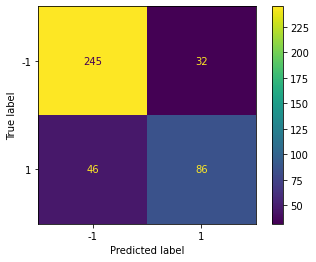

In [53]:
bestModel=LinearDiscriminantAnalysis(shrinkage= 0.02, solver ='lsqr')
bestModel.fit(pimaXtrain,pimaYtrain)
plot_confusion_matrix(bestModel, pimaXtest,pimaYtest)  

In [54]:
confusionMatrix=confusion_matrix(pimaYtest,bestModel.predict(pimaXtest))
fauxNegatif= confusionMatrix[1,0]/(confusionMatrix[1,1]+confusionMatrix[1,0])
print("Le taux de faux négatif est :",round(fauxNegatif,3))

Le taux de faux négatif est : 0.348


**comment** The rate of false negative is about 34%, that is really too much in order to use our model in real world. It means that 34% of sick people aren't diagnosed sick, it is a big issue for a medical model.

• Since a false negative can have an important medical impact, propose a new threshold for the predicted score that leads to a FNR of less that 10% (this can be done by changing manually the value of the intercept_ in the trained classifier).


In [55]:
print("L'intercept est :",round(bestModel.intercept_[0],3))

L'intercept est : -9.17


In [56]:
pas=0.01
compteur=1
intercept=bestModel.intercept_[0]
while fauxNegatif>0.1:
    bestModel.intercept_[0]+=pas
    confusionMatrix=confusion_matrix(pimaYtest,bestModel.predict(pimaXtest))
    fauxNegatif= confusionMatrix[1,0]/(confusionMatrix[1,1]+confusionMatrix[1,0])
    compteur+=1
    #print(fauxNegatif)
    #print(intercept)
    
print("L'intercept seuil est :",round(bestModel.intercept_[0],3))
print("Avec l'intercept seuil, on a uh taux de faux négatif de  :",round(fauxNegatif,3))


L'intercept seuil est : -8.09
Avec l'intercept seuil, on a uh taux de faux négatif de  : 0.098


**comment** With this new rate, we have achieved the rate of False negative we wanted. Let's see the new confusion matrix.

/Users/martialgil/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


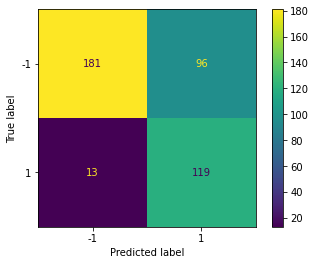

In [57]:
plot_confusion_matrix(bestModel, pimaXtest,pimaYtest)  

**comment** We have really better False negative rate, but the overall algorithm is biased.

# 3 Predicting Classes on the Digits dataset

In [60]:
score=[]
index=[]

**comment** These lists are build in order to store the performance of the different algorithms we are going to try in this lab.

**comment** Here, there are some tasks that are really repetitive, so I have decided to build a general function in order to offer an easier reading for this notebook.

In [61]:
X_Train_Digit=digitFile["xt"]
Y_Train_Digit=digitFile["yt"]
X_Test_Digit=digitFile["x"]
Y_Test_Digit=digitFile["y"]

In [62]:
def testDuModelDigit(model,paramGrid,X_train,Y_train,X_test,Y_test):
    
    reg_param_GS = GridSearchCV(model, param_grid =paramGrid ) 
    reg_param_GS.fit(X_train,Y_train)
    print("The best estimator across all searched params:\n",reg_param_GS.best_params_)
    print("\n####################################################################")
    Y_trainPredict= reg_param_GS.predict(X_train)
    Y_testPredict= reg_param_GS.predict(X_test)
    
    acTrain =accuracy_score(Y_train, Y_trainPredict)
    acTest=accuracy_score(Y_test,Y_testPredict )
    print("\nAccuracy Score")
    print("Accuracy Training is :", acTrain)
    print("Accuracy Test is :",acTest)
    
    f1_train= f1_score(Y_train,Y_trainPredict, average='macro')
    f1_test= f1_score(Y_test,Y_testPredict, average='macro')
    print("\n F1 Score Score")
    print("F1 Score Training is :", f1_train)
    print("F1 Score Test is :", f1_test)
    print("\n####################################################################")

    liste=[acTrain,acTest,f1_train,f1_test]
    
    return liste


###Cette algorithme donne les performances d'un model par defaut
def testDuModelSansOptimisationDigit(model,X_train,Y_train,X_test,Y_test,affichage=0):
    
    model.fit(X_train,Y_train)
     
    Y_trainPredict= model.predict(X_train)
    Y_testPredict= model.predict(X_test)
    acTrain =accuracy_score(Y_train, Y_trainPredict)
    acTest=accuracy_score(Y_test,Y_testPredict )
    print("Accuracy Score")
    print("Accuracy Training is :", acTrain)
    print("Accuracy Test is :",acTest)

    f1_train= f1_score(Y_train,Y_trainPredict, average='macro')
    f1_test= f1_score(Y_test,Y_testPredict, average='macro')
    print("\n F1 Score Score")
    print("F1 Score Training is :", f1_train)
    print("F1 Score Test is :", f1_test)
    #print("\n####################################################################")
    
    liste=[acTrain,acTest]
    if affichage==1:
        return liste
    return 



## 3.1 Evaluate the different supervised methods

For at least the following classifiers
LinearDiscriminantAnalysis,LogisticRegression,SVC,MLPClassifier do the following.

### LinearDiscriminantAnalysis

• Fit the model with the default parameters and compute its prediction performance (accuracy on test data).

In [63]:
lda = LinearDiscriminantAnalysis()

testDuModelSansOptimisationDigit(lda,X_Train_Digit,
                                 np.ravel(Y_Train_Digit),
                            X_Test_Digit,
                                 np.ravel(Y_Test_Digit))

Accuracy Score
Accuracy Training is : 0.996
Accuracy Test is : 0.897

 F1 Score Score
F1 Score Training is : 0.9960059103752611
F1 Score Test is : 0.896225495718303


**comment**  We are getting really good results. But we are clearly overfitting, because for our train dataset, we are are nearly at one and it is not the case of the test.

• Do a quick validation of some of the important parameters (manually or with sklearn classes) to get a better performance if possible.

• Store the model and the accuracy for the best parameter configuration.

In [64]:
solver=["svd", "lsqr", "eigen"]
shrinkage=np.arange(0.05,0.80,0.05)
parametre_LDA={"solver": solver,
              "shrinkage": shrinkage
              }
parametre_LDA

{'solver': ['svd', 'lsqr', 'eigen'],
 'shrinkage': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
        0.6 , 0.65, 0.7 , 0.75])}

In [65]:
lda = LinearDiscriminantAnalysis()

perf = testDuModelDigit(lda,parametre_LDA,X_Train_Digit,
                                 np.ravel(Y_Train_Digit),
                                 X_Test_Digit,
                                 np.ravel(Y_Test_Digit))

score.append(perf)
index.append("lda")


/Users/martialgil/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
75 fits failed out of a total of 225.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/martialgil/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/martialgil/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/discriminant_analysis.py", line 583, in fit
    raise NotImplementedError("shrinkage not supported")
NotImplementedError: shrinkage not supported

  warnings.warn(some_fits_failed_m

The best estimator across all searched params:
 {'shrinkage': 0.45, 'solver': 'lsqr'}

####################################################################

Accuracy Score
Accuracy Training is : 0.976
Accuracy Test is : 0.9576666666666667

 F1 Score Score
F1 Score Training is : 0.9760386858275057
F1 Score Test is : 0.9574759937832438

####################################################################


**comment** The tunning of our model has really a lot of effect. In fact,  the train scores have decreased but we are nearly at 1 for the test. Really effective this tunning of parameters !

### LogisticRegression

• Fit the model with the default parameters and compute its prediction performance (accuracy on test data).

In [66]:
lr = LogisticRegression(max_iter=3000)

testDuModelSansOptimisationDigit(lr,X_Train_Digit,
                                 np.ravel(Y_Train_Digit),
                            X_Test_Digit,
                                 np.ravel(Y_Test_Digit))

Accuracy Score
Accuracy Training is : 1.0
Accuracy Test is : 0.9683333333333334

 F1 Score Score
F1 Score Training is : 1.0
F1 Score Test is : 0.9682600609553141


**comment** With the default value, we are achieving great results, we have better performance than our previous tunned model. But we are clearly overfitting, we have 1 for the train accuracy and F1 score. 

• Do a quick validation of some of the important parameters (manually or with sklearn classes) to get a better performance if possible.

• Store the model and the accuracy for the best parameter configuration.

In [67]:
penalty=[ "l2"]
C=np.logspace(-2,1,20)
paramlr={"penalty" : penalty,
         "C":C
        }
paramlr

{'penalty': ['l2'],
 'C': array([ 0.01      ,  0.0143845 ,  0.02069138,  0.02976351,  0.04281332,
         0.06158482,  0.08858668,  0.1274275 ,  0.18329807,  0.26366509,
         0.37926902,  0.54555948,  0.78475997,  1.12883789,  1.62377674,
         2.33572147,  3.35981829,  4.83293024,  6.95192796, 10.        ])}

In [68]:
lr = LogisticRegression(max_iter=3000)
perf = testDuModelDigit(lr,paramlr,X_Train_Digit,
                                 np.ravel(Y_Train_Digit),
                            X_Test_Digit,
                                 np.ravel(Y_Test_Digit))

score.append(perf)
index.append("lr")

The best estimator across all searched params:
 {'C': 0.029763514416313176, 'penalty': 'l2'}

####################################################################

Accuracy Score
Accuracy Training is : 1.0
Accuracy Test is : 0.9736666666666667

 F1 Score Score
F1 Score Training is : 1.0
F1 Score Test is : 0.9736258429214254

####################################################################


**comment** The performance has increased. At this time, it is the best non linear model.

### SVC

• Fit the model with the default parameters and compute its prediction performance (accuracy on test data).

In [69]:
svc = SVC()
testDuModelSansOptimisationDigit(svc,X_Train_Digit,
                                 np.ravel(Y_Train_Digit),
                            X_Test_Digit,
                                 np.ravel(Y_Test_Digit))

Accuracy Score
Accuracy Training is : 0.998
Accuracy Test is : 0.986

 F1 Score Score
F1 Score Training is : 0.997999981999838
F1 Score Test is : 0.9859933860037969


**comment** This default model is also great. We are also maybe overfitting, but the test and train scores are really close !

• Do a quick validation of some of the important parameters (manually or with sklearn classes) to get a better performance if possible.

• Store the model and the accuracy for the best parameter configuration.

In [70]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
degree = np.arange(1,6)
coef0 = np.arange(0,10)/5
gamma = [1/90, 1/85, 1/80, 1/75, 1/70, 1/65, 1/60, 1/55, 1/50, 1/45]
parametre_SVC={"gamma":gamma,"kernel":kernel,"degree":degree,"coef0":coef0  }
parametre_SVC        

{'gamma': [0.011111111111111112,
  0.011764705882352941,
  0.0125,
  0.013333333333333334,
  0.014285714285714285,
  0.015384615384615385,
  0.016666666666666666,
  0.01818181818181818,
  0.02,
  0.022222222222222223],
 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
 'degree': array([1, 2, 3, 4, 5]),
 'coef0': array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8])}

In [71]:
svc = SVC()
perf=testDuModelDigit(svc,
            parametre_SVC,X_Train_Digit,
                            np.ravel(Y_Train_Digit),
                            X_Test_Digit,
                            np.ravel(Y_Test_Digit))
score.append(perf)
index.append("SVC")

The best estimator across all searched params:
 {'coef0': 0.0, 'degree': 2, 'gamma': 0.011111111111111112, 'kernel': 'poly'}

####################################################################

Accuracy Score
Accuracy Training is : 1.0
Accuracy Test is : 0.9823333333333333

 F1 Score Score
F1 Score Training is : 1.0
F1 Score Test is : 0.9823205912330222

####################################################################


**comment** We have really similar results than before, this non linear algorithm is the best for the moment.

### MLPClassifier

• Fit the model with the default parameters and compute its prediction performance (accuracy on test data).

In [72]:
clf_MPL = MLPClassifier(max_iter=3000)
testDuModelSansOptimisationDigit(clf_MPL,X_Train_Digit,
                                 np.ravel(Y_Train_Digit),
                            X_Test_Digit,
                                 np.ravel(Y_Test_Digit))



Accuracy Score
Accuracy Training is : 1.0
Accuracy Test is : 0.9696666666666667

 F1 Score Score
F1 Score Training is : 1.0
F1 Score Test is : 0.9696417100679794


**comment** Compare to others default models, it is not really good. We are also clearly overfitting.

• Do a quick validation of some of the important parameters (manually or with sklearn classes) to get a better performance if possible.

• Store the model and the accuracy for the best parameter configuration.

In [73]:
nb_neurons = [2,5,10,15,25,50,100]
nb_epochs = [30, 50, 70, 100]
activation = ["identity", "logistic", "tanh", "relu"]
learning_rate= ["constant", "invscaling", "adaptive"]
parametre_NN={"hidden_layer_sizes":nb_neurons,
              "n_iter_no_change":nb_epochs,
             "activation":activation,
              "learning_rate":learning_rate
             }

parametre_NN  

{'hidden_layer_sizes': [2, 5, 10, 15, 25, 50, 100],
 'n_iter_no_change': [30, 50, 70, 100],
 'activation': ['identity', 'logistic', 'tanh', 'relu'],
 'learning_rate': ['constant', 'invscaling', 'adaptive']}

In [74]:
clf_MPL = MLPClassifier(max_iter=3000)
perf=testDuModelDigit(clf_MPL,
            parametre_NN,X_Train_Digit,
                            np.ravel(Y_Train_Digit),
                            X_Test_Digit,
                            np.ravel(Y_Test_Digit))
score.append(perf)
index.append("MLP")

The best estimator across all searched params:
 {'activation': 'tanh', 'hidden_layer_sizes': 100, 'learning_rate': 'invscaling', 'n_iter_no_change': 70}

####################################################################

Accuracy Score
Accuracy Training is : 1.0
Accuracy Test is : 0.98

 F1 Score Score
F1 Score Training is : 1.0
F1 Score Test is : 0.9799925847348042

####################################################################


**comment** The tunning hasn't help a lot to increase performance. If we want to use a neural network, we need to use an adapted architecture (like CNN) in order to get better results.

## 3.2 Interpreting the classifier

• Compare the performances of the different methods (with different metrics). Which model is the best on test data?

In [75]:
columns = ['Train Accuracy', 'Test Accuracy',"Train F1","Test F1"]#,'Train ROC AUC','Test ROC AUC']
comparaison = pd.DataFrame(score, index=index, columns=columns)
print(comparaison)

     Train Accuracy  Test Accuracy  Train F1   Test F1
lda           0.976       0.957667  0.976039  0.957476
lr            1.000       0.973667  1.000000  0.973626
SVC           1.000       0.982333  1.000000  0.982321
MLP           1.000       0.980000  1.000000  0.979993


**comment** The clear winner from all these models is the SVC. In fact, it is the only one to have an accuracy and F1 score above 98% for the test dataset.

• Select the best classifier from the previous section and use it to predict labels on the test data.

In [76]:
bestClasifier = SVC(coef0= 0.0, degree= 2, gamma = 0.011111111111111112, kernel= 'poly')
bestClasifier.fit(X_Train_Digit,np.ravel(Y_Train_Digit))
prediction =bestClasifier.predict(X_Test_Digit)

• Compute the confusion matrix and interpret the errors made by the classifier. What is the class that
is the most difficult to recognize? Are there somme classes that are harder to discriminate?

In [77]:
conf_mat = confusion_matrix(np.ravel(Y_Test_Digit), prediction)
index = ['True class 1', 'True class 7', 'True class 8']
columns = ['Predicted class 1', 'Predicted class 7', 'Predicted class 8'] 
conf_mat_df = pd.DataFrame(conf_mat, index=index, columns=columns) 
print("Confusion matrix : \n", conf_mat_df)

Confusion matrix : 
               Predicted class 1  Predicted class 7  Predicted class 8
True class 1                974                  9                 17
True class 7                  2                993                  5
True class 8                 11                  9                980


**comment** This matrix is a bit surprising. Indeed, we could think that 1 and 7 are more similar together than 8. So we would except to have more "confusion" in the prediction of class 1 and 7. But is not what we are seeing. Indeed, more 1 are predicted like 8 than 7, and same observation for 7. This matrix show us 1 is the class that is less well predicted.

• Plot some of the sample that are miss-classified. Are they difficult to recognize ? Why did the classifier fail to recognize them?

Images mal classées du test dataset


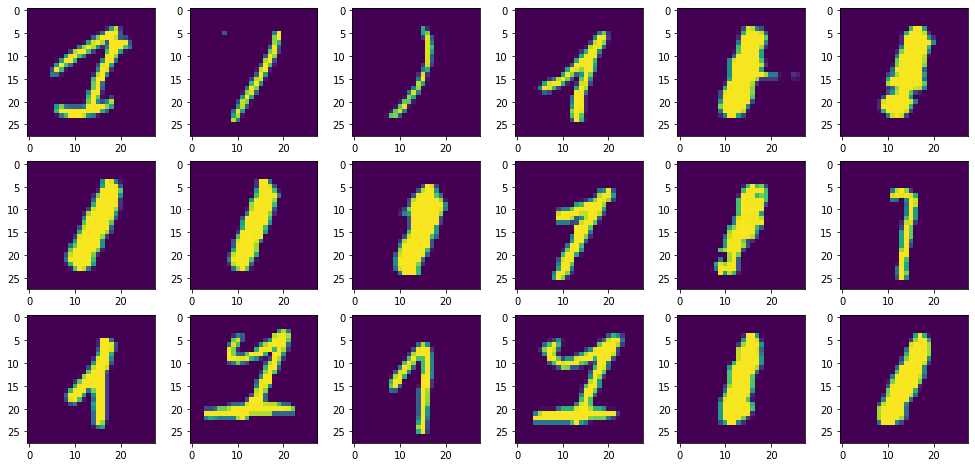

In [78]:
image_mal_classe = X_Test_Digit[np.ravel(Y_Test_Digit) != prediction]

print('Images mal classées du test dataset')

plt.figure(figsize = (17,8))
for i in range(18):
    hasard= randint(0,len(image_mal_classe)-1)
    plt.subplot(3, 6, i+1)
    plt.imshow(image_mal_classe[i].reshape(28, 28)) 
    
        

**comment** We understand better why the classifier incorrectly predicted the classes of these images: all these figures are badly written.

• Pick a well classified sample and create 1000 noisy samples of it by adding gaussian noise (np.random. randn). Pick a level of noise that allows you to still distinguish clearly the class. Compute the accuracy of the classifier on those 1000 noisy samples. If the accuracy is 1, increase the noise level or choose another well classified sample.

l'image choisie est un  7


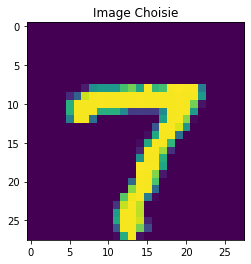

In [79]:
image_bien = X_Test_Digit[np.ravel(Y_Test_Digit) == prediction]
y_bien= Y_Test_Digit[np.ravel(Y_Test_Digit) == prediction]
hasard= 1480#randint(0,len(image_bien)-1)
image_bien=image_bien[hasard]
y_bien=y_bien[hasard]
plt.imshow(image_bien.reshape(28, 28)) 
plt.title("Image Choisie")
print("l'image choisie est un ",y_bien[0])

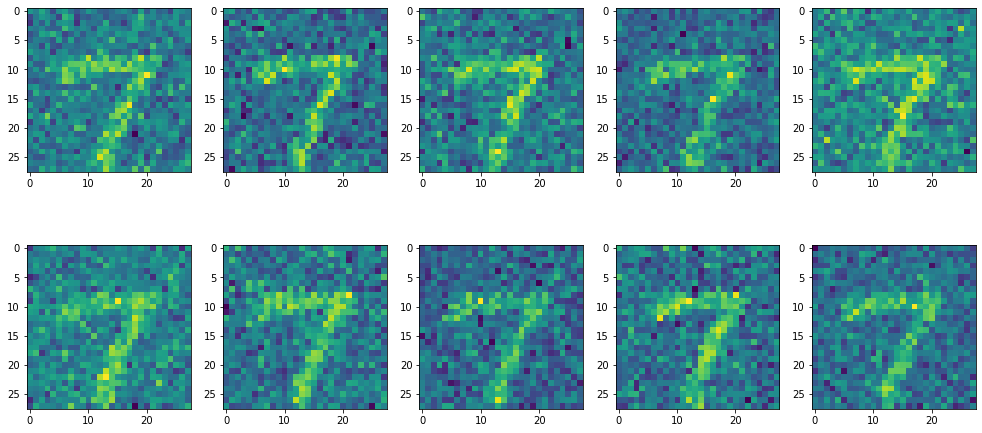

In [80]:
sigma = 100
noisy_samples = np.asarray([image_bien.ravel(),] * 1000) + sigma *np.random.randn(1000, len(image_bien)) 
index = np.random.randint(0, 1000, 10)
plt.figure(figsize=(17,8)) 
for i in range(10):
    plt.subplot(2, 5, i+1) 
    plt.imshow(noisy_samples[index[i]].reshape(28, 28)) 
    

**comment** Our digits have a lot of noise, it doesn't look like to an image from our dataset. But as a human, we could recognize the number.

In [81]:
prediction_noise =bestClasifier.predict(noisy_samples)
newY=[y_bien[0]]*1000
print("accuracy is :",accuracy_score(newY, prediction_noise))

accuracy is : 1.0


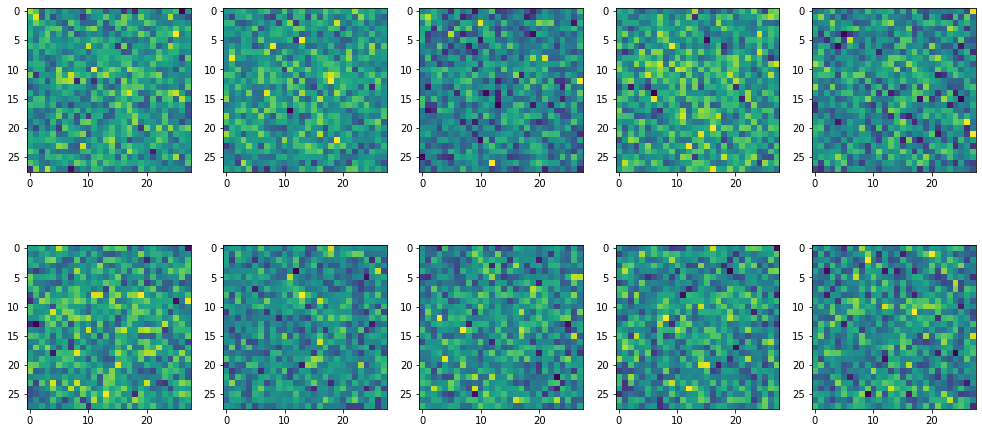

In [82]:
sigma = 400
noisy_samples = np.asarray([image_bien.ravel(),] * 1000) + sigma *np.random.randn(1000, len(image_bien)) 
index = np.random.randint(0, 1000, 10)
plt.figure(figsize=(17,8)) 
for i in range(10):
    plt.subplot(2, 5, i+1) 
    plt.imshow(noisy_samples[index[i]].reshape(28, 28)) 
    

**comment** Our digits have really a lot of noise. it doesn't look like at all of images from our dataset. As a human, we couldn't recognize anymore the number.

In [83]:
prediction_noise =bestClasifier.predict(noisy_samples)
newY=[y_bien[0]]*1000
print("accuracy is :",accuracy_score(newY, prediction_noise))

accuracy is : 0.812


• How robust is the classifier? Visualise some of those "adversarial" examples when the accuracy on the noisy samples is not 1.

In [84]:
conf_mat = confusion_matrix(np.ravel(newY), prediction_noise)
index = ['True class 1', 'True class 7', 'True class 8']
columns = ['Predicted class 1', 'Predicted class 7', 'Predicted class 8'] 
conf_mat_df = pd.DataFrame(conf_mat, index=index, columns=columns) 
print("Confusion matrix : \n", conf_mat_df)

Confusion matrix : 
               Predicted class 1  Predicted class 7  Predicted class 8
True class 1                  0                  0                  0
True class 7                 15                812                173
True class 8                  0                  0                  0


**comment** SCV is really robust. Indeed, we have pictures that don't look like at all from a picture of our initial dataset and aren't even readable. But our model could roughly predict the good class. It is really impressive how it is robust

## Bonus: Convolutional Neural network (CNN)

mplement a CNN and train it on the data (you will need to reshape it to store it as images). Investigate te performance of the CNN when varying its parameters. Does it have better performance than the model above? Is it more robust to adversarial examples?.

In [85]:
def transfo(x):
    if x==1:
        return 0
    if x==7:
        return 1
    if x==8:
        return 2

data=pd.Series(digitFile["y"].T[0])
data=data.apply(lambda x : transfo(x))
y=data.tolist()
trainX, testX,trainY, testY  =train_test_split(digitFile["x"], y, train_size=2000, shuffle=True)
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))
trainY = to_categorical(trainY)
testY = to_categorical(testY)

def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm
trainX, testX = prep_pixels(trainX, testX)


In [86]:
n_epochs = 100
batch_size = 64
nb_filters = 8
kernel_size = (3, 3)
pool_size = (2, 2)

In [87]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Conv2D(nb_filters, kernel_size, padding='same', input_shape=(28, 28,1), activation='relu'))
#model.add(Conv2D(nb_filters, kernel_size, padding='same', activation='relu')) 
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same')) #model.output_shape
model.add(Conv2D(nb_filters, kernel_size, padding='same', activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2), padding='same')) #model.output_shape
model.add(Dropout(0.2))
model.add(Flatten())
#model.add(Dense(3, activation='softmax'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         80        
                                                                 
 dropout (Dropout)           (None, 28, 28, 8)         0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         584       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 8)           0

In [88]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history =model.fit(trainX, trainY, epochs=n_epochs, validation_data=(testX, testY), batch_size=batch_size)

Epoch 1/100
32/32 [==============================] - 1s 18ms/step - loss: 0.9769 - accuracy: 0.5655 - val_loss: 0.8301 - val_accuracy: 0.8650
Epoch 2/100
32/32 [==============================] - 0s 14ms/step - loss: 0.5795 - accuracy: 0.8970 - val_loss: 0.3766 - val_accuracy: 0.9510
Epoch 3/100
32/32 [==============================] - 0s 13ms/step - loss: 0.2464 - accuracy: 0.9415 - val_loss: 0.1761 - val_accuracy: 0.9660
Epoch 4/100
32/32 [==============================] - 0s 13ms/step - loss: 0.1600 - accuracy: 0.9505 - val_loss: 0.1271 - val_accuracy: 0.9690
Epoch 5/100
32/32 [==============================] - 0s 13ms/step - loss: 0.1290 - accuracy: 0.9605 - val_loss: 0.1007 - val_accuracy: 0.9740
Epoch 6/100
32/32 [==============================] - 0s 13ms/step - loss: 0.1122 - accuracy: 0.9635 - val_loss: 0.0927 - val_accuracy: 0.9800
Epoch 7/100
32/32 [==============================] - 0s 13ms/step - loss: 0.0954 - accuracy: 0.9690 - val_loss: 0.0864 - val_accuracy: 0.9810
Epoch 

32/32 [==============================] - 0s 13ms/step - loss: 0.0133 - accuracy: 0.9960 - val_loss: 0.0335 - val_accuracy: 0.9880
Epoch 59/100
32/32 [==============================] - 0s 13ms/step - loss: 0.0167 - accuracy: 0.9955 - val_loss: 0.0337 - val_accuracy: 0.9910
Epoch 60/100
32/32 [==============================] - 0s 13ms/step - loss: 0.0156 - accuracy: 0.9950 - val_loss: 0.0358 - val_accuracy: 0.9870
Epoch 61/100
32/32 [==============================] - 0s 14ms/step - loss: 0.0143 - accuracy: 0.9950 - val_loss: 0.0327 - val_accuracy: 0.9880
Epoch 62/100
32/32 [==============================] - 0s 13ms/step - loss: 0.0111 - accuracy: 0.9970 - val_loss: 0.0292 - val_accuracy: 0.9920
Epoch 63/100
32/32 [==============================] - 0s 13ms/step - loss: 0.0123 - accuracy: 0.9950 - val_loss: 0.0324 - val_accuracy: 0.9870
Epoch 64/100
32/32 [==============================] - 0s 13ms/step - loss: 0.0168 - accuracy: 0.9945 - val_loss: 0.0294 - val_accuracy: 0.9890
Epoch 65/100

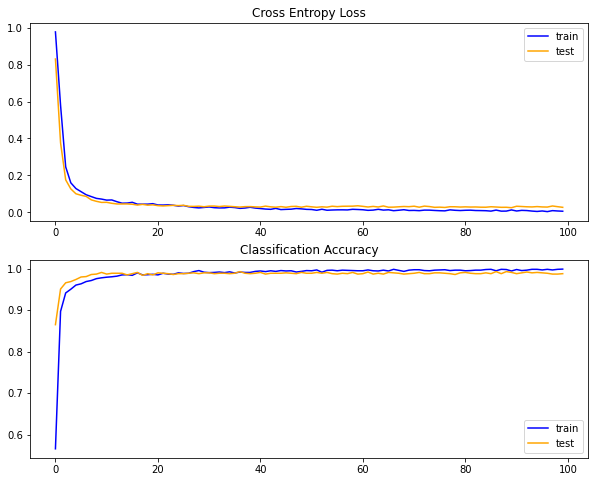

In [89]:
plt.figure(figsize=(10,8))
plt.subplot(2, 1, 1)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
plt.legend()

plt.subplot(2, 1, 2)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.legend()
plt.show()

In [90]:
print("the accuracy on the train dataset is :",history.history['val_accuracy'][-1])

the accuracy on the train dataset is : 0.9880000352859497


**comment** The use of the data structure give a real adavantage for CNN, we are clearly getting better result than our previous method. It is the good structure

#### Test sur adversarail

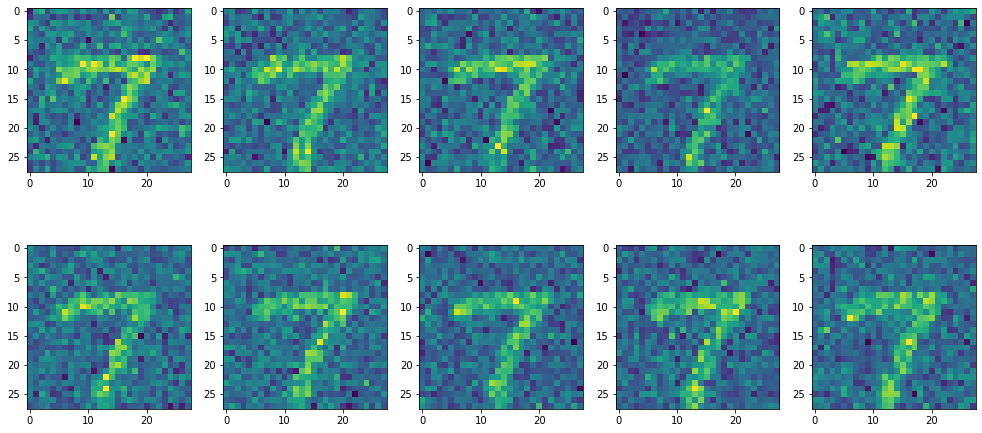

In [91]:
sigma = 80
noisy_samples = np.asarray([image_bien.ravel(),] * 1000) + sigma *np.random.randn(1000, len(image_bien)) 
index = np.random.randint(0, 1000, 10)
plt.figure(figsize=(17,8)) 
for i in range(10):
    plt.subplot(2, 5, i+1) 
    plt.imshow(noisy_samples[index[i]].reshape(28, 28)) 
    

In [92]:


def transfo(x):
    if x==1:
        return 0
    if x==7:
        return 1
    if x==8:
        return 2
newY=[y_bien[0]]*1000
data=pd.Series(newY)
data=data.apply(lambda x : transfo(x))
y=data.tolist()
noisy_samples=noisy_samples
X_adversarial = noisy_samples.reshape((noisy_samples.shape[0], 28, 28, 1))


def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm
X_adversarial, _ = prep_pixels(X_adversarial, X_adversarial)

In [93]:
predictionCNN_Adversarail = np.argmax(model.predict(X_adversarial),axis=1)

In [94]:
print("accuracy is :",accuracy_score(newY, predictionCNN_Adversarail))

accuracy is : 0.0


**comment** The CNN model is really less robust from adversarial attack than our previous "best model". In fact, with the previous, we had an accuracry of 1. Now we have nearly 0 as accuracy.

# Personal discussion about the session

Personally, this TP was longer and more diﬀicult than the previous ones. However, I found it really interesting.<br>
First of all, I learnt in this lab it is important to code in a smart way. In fact, I could repeat the same code many times, because there are a lot of similar questions in this lab with different models. But I coded a kind of generic function in order to save time and help to read the notebook smoothly.<br>
I really had trouble understanding two questions at the beginning: the one about the separability of the data (as a histogram, in part 2.2) and the one where we had to change the intercept of the model so that the False Negative rate was less than 10% (part 2.4).<br>
Furthermore, many methods were new for me: LDA, QDA and NB. It is by implementing them that I could understand how they work. In TP2, we had used the others (Random Forest, SVC, MLP, Gradient Boosting) to do regression but not classification.<br>
I have really liked the optional part about CNN at the end, which I would have liked to do in TP2. <br>
Finally, I think that these methods will be useful in the professional world. The linear methods (LDA and logistic regression) showed in this TP how eﬀicient they can be. And the non-linear models put into practice are all famous and represent good alernatives after trying the linear models first. And using a CNN was useful but more complex than using the MLP, it is important to take structure information about a structured dataset.
